In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/Euron/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Euron/test.csv')
submission=pd.read_csv('/content/drive/MyDrive/Euron/gender_submission.csv')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(5, 128),
            ## Batch Normalization between 'Layer' and 'Activation function'
            nn.BatchNorm1d(128),
            nn.ReLU(),
            ## Drop out after 'Activation function'
            nn.Dropout(0.1),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
data_set = pd.concat((train.drop(['Survived'], axis = 1), test), axis = 0)

data_set = data_set.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
data_set = data_set.fillna(data_set.mean())

n_train = train.shape[0]
train_x, test_x = data_set[:n_train], data_set[n_train:]
train_y = train['Survived']

train_x = train_x[train_x.keys()].values
test_x = test_x[test_x.keys()].values
train_y = train_y.values

import torch.optim as optim
from torch.autograd import Variable

simple_nn = SimpleNN()
optimizer = optim.Adam(simple_nn.parameters(), lr=0.01)
error = nn.BCELoss()

batch_size = 99
batch_count = int(len(train_x) / batch_size)

for epoch in range(300):
    train_loss = 0
    num_right = 0
    for i in range(batch_count):
        start = i * batch_size
        end = start + batch_size
        tensor_x = torch.FloatTensor(train_x[start:end])
        tensor_y = torch.FloatTensor(train_y[start:end]).reshape(-1, 1)

        optimizer.zero_grad()
        output = simple_nn(tensor_x)
        loss = error(output, tensor_y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * batch_size
        result = [1 if out >= 0.5 else 0 for out in output]
        num_right += np.sum(np.array(result) == train_y[start:end])

    train_loss = train_loss / len(train_x)
    accuracy = num_right / len(train_x)

    if epoch % 25 == 0:
        print('Loss: {} Accuracy: {}% Epoch:{}'.format(train_loss, accuracy, epoch))

print('Training Ended')

Loss: 0.6487502985530429 Accuracy: 0.6509539842873177% Epoch:0
Loss: 0.5166419612036811 Accuracy: 0.7542087542087542% Epoch:25
Loss: 0.4655126631259918 Accuracy: 0.7833894500561167% Epoch:50
Loss: 0.4168385366598765 Accuracy: 0.8080808080808081% Epoch:75
Loss: 0.40057211452060276 Accuracy: 0.8260381593714927% Epoch:100
Loss: 0.3409700459904141 Accuracy: 0.8529741863075196% Epoch:125
Loss: 0.3282558454407586 Accuracy: 0.8630751964085297% Epoch:150
Loss: 0.29826966093646157 Accuracy: 0.8608305274971941% Epoch:175
Loss: 0.27613266971376205 Accuracy: 0.877665544332211% Epoch:200
Loss: 0.2533235516813066 Accuracy: 0.8866442199775533% Epoch:225
Loss: 0.2562143752972285 Accuracy: 0.9001122334455668% Epoch:250
Loss: 0.2377128220266766 Accuracy: 0.8967452300785634% Epoch:275
Training Ended


In [ ]:
tensor_test_x=torch.FloatTensor(test_x)
with torch.no_grad():
  test_output=simple_nn(tensor_test_x)
  result=np.array([1 if out >=0.5 else 0 for out in test_output])
  submission=pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived':result})
  submission.to_csv('submission.csv', index=False)

## Batch_Normalization

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

#number of subprocesses to use for data loading
num_workers=0
#how many samples per batch to load
batch_size=64

#convert data to torch.FloatTensor
transform=transforms.ToTensor()

#get the training and test datasets
train_data=datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data=datasets.MNIST(root='data', train=False, download=True, transform=transform)

#prepare data loaders
train_loader=torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader=torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15353925.00it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 519044.72it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3749970.93it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6985892.47it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



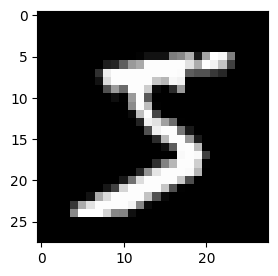

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, use_batch_norm, input_size=784, hidden_dim=256, output_size=10):
        super(NeuralNet, self).__init__() # init super

        # Default layer sizes
        self.input_size = input_size # (28*28 images)
        self.hidden_dim = hidden_dim
        self.output_size = output_size # (number of classes)
        # Keep track of whether or not this network uses batch normalization.
        self.use_batch_norm = use_batch_norm

        # define hidden linear layers, with optional batch norm on their outputs
        # layers with batch_norm applied have no bias term
        if use_batch_norm:
            self.fc1 = nn.Linear(input_size, hidden_dim*2, bias=False)
            self.batch_norm1 = nn.BatchNorm1d(hidden_dim*2)
        else:
            self.fc1 = nn.Linear(input_size, hidden_dim*2)

        # define *second* hidden linear layers, with optional batch norm on their outputs
        if use_batch_norm:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim, bias=False)
            self.batch_norm2 = nn.BatchNorm1d(hidden_dim)
        else:
            self.fc2 = nn.Linear(hidden_dim*2, hidden_dim)

        # third and final, fully-connected layer
        self.fc3 = nn.Linear(hidden_dim, output_size)


    def forward(self, x):
        # flatten image
        x = x.view(-1, 28*28)
        # all hidden layers + optional batch norm + relu activation
        x = self.fc1(x)
        if self.use_batch_norm:
            x = self.batch_norm1(x)
        x = F.relu(x)
        # second layer
        x = self.fc2(x)
        if self.use_batch_norm:
            x = self.batch_norm2(x)
        x = F.relu(x)
        # third layer, no batch norm or activation
        x = self.fc3(x)
        return x


In [ ]:
net_batchnorm = NeuralNet(use_batch_norm=True)
net_no_norm = NeuralNet(use_batch_norm=False)

print(net_batchnorm)
print()
print(net_no_norm)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=512, bias=False)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=False)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

NeuralNet(
  (fc1): Linear(in_features=512, out_features=256, bias=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
def train(model, n_epochs=10):
  #number of epochs to train the model
  n_epochs=n_epochs

  #track losses
  losses=[]

  #optimization strategy
  #specify loss function  (categorical cross-entropy)
  criterion=nn.CrossEntropyLoss()

  #specify optimizer (stochastic gradient descent) and learning rate=0.01
  optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

  #set the model to training mode
  model.train()

  for epoch in range(1, n_epochs+1):
        # monitor training loss
        train_loss = 0.0

        # train the model

        batch_count = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update average training loss
            train_loss += loss.item() # add up avg batch loss
            batch_count +=1

        # print training statistics
        losses.append(train_loss/batch_count)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch,train_loss/batch_count))

  # return all recorded batch losses
  return losses

In [ ]:
losses_batchnorm = train(net_batchnorm)
losses_no_norm = train(net_no_norm)
# compare
fig, ax = plt.subplots(figsize=(12,8))
#losses_batchnorm = np.array(losses_batchnorm)
#losses_no_norm = np.array(losses_no_norm)
plt.plot(losses_batchnorm, label='Using batchnorm', alpha=0.5)
plt.plot(losses_no_norm, label='No norm', alpha=0.5)
plt.title("Training Losses")
plt.legend()

NotImplementedError: Module [NeuralNet] is missing the required "forward" function

In [ ]:
def test(model, train):
    # initialize vars to monitor test loss and accuracy
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    test_loss = 0.0

    # set model to train or evaluation mode
    # just to see the difference in behavior
    if(train==True):
        model.train()
    if(train==False):
        model.eval()

    # loss criterion
    criterion = nn.CrossEntropyLoss()

    for batch_idx, (data, target) in enumerate(test_loader):
        batch_size = data.size(0)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss
        test_loss += loss.item()*batch_size
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    print('Test Loss: {:.6f}\n'.format(test_loss/len(test_loader.dataset)))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [ ]:
# test batchnorm case, in *train* mode
test(net_batchnorm, train=True)
# test batchnorm case, in *evaluation* mode
test(net_batchnorm, train=False)
# for posterity, test no norm case in eval mode
test(net_no_norm, train=False)

NotImplementedError: Module [NeuralNet] is missing the required "forward" function